# Loan Status Prediction by Logistic Regression

### Load the data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("loan.csv")

### Explore the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


- 61 entries -> too small
- No missing value
- Categorical and numerical features
- 7 features

In [4]:
df.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


- Age between 24 & 55. Mean 37.
- Income between 25K & 180K. Mean ~78K.
- Credit score between 560 & 830. Mean ~710.

In [6]:
df.loan_status.value_counts(normalize=True)

loan_status
Approved    0.737705
Denied      0.262295
Name: proportion, dtype: float64

- Binary classification: Approved vs Denied
- Class distribution: ~74-26. Approved is dominant.

### Prepare the data

#### Convert categorical variables

In [7]:
df.select_dtypes(include=['object']).columns

Index(['gender', 'occupation', 'education_level', 'marital_status',
       'loan_status'],
      dtype='object')

##### Gender

In [8]:
df.gender.value_counts()

gender
Male      31
Female    30
Name: count, dtype: int64

- Two unique values
- Balanced
- Nominal

In [35]:
df['gender_male'] = (df['gender'] == 'Male').astype(int)

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status,sector,gender_male
0,32,Male,Engineer,3,Married,85000,720,Approved,Engineering/IT,1
1,45,Female,Teacher,4,Single,62000,680,Approved,Education,0
2,28,Male,Student,1,Single,25000,590,Denied,Education,1
3,51,Female,Manager,3,Married,105000,780,Approved,Business/Finance,0
4,36,Male,Accountant,3,Married,75000,710,Approved,Business/Finance,1


In [43]:
df = df.drop(columns=['gender'])

##### Occupation

In [12]:
df.occupation.value_counts()

occupation
Engineer        5
Analyst         2
Chef            2
Writer          2
Banker          2
Receptionist    2
Teacher         2
Professor       2
Designer        2
Marketing       2
Salesman        2
Architect       2
Consultant      2
Doctor          2
IT              2
Artist          2
Lawyer          2
Nurse           2
Accountant      2
Manager         2
Photographer    1
Server          1
Psychologist    1
Software        1
Musician        1
Dentist         1
Programmer      1
Editor          1
Pilot           1
Realtor         1
Electrician     1
HR              1
Sales           1
Veterinarian    1
Researcher      1
Pharmacist      1
Student         1
Stylist         1
Name: count, dtype: int64

- High cardinality - 38 unique categories

In [13]:
occupation_to_sector = {
    'Engineer': 'Engineering/IT',
    'Analyst': 'Business/Finance',
    'Chef': 'Hospitality',
    'Writer': 'Creative/Art',
    'Banker': 'Business/Finance',
    'Receptionist': 'Hospitality',
    'Teacher': 'Education',
    'Professor': 'Education',
    'Designer': 'Creative/Art',
    'Marketing': 'Marketing/Sales',
    'Salesman': 'Hospitality',
    'Architect': 'Other',
    'Consultant': 'Business/Finance',
    'Doctor': 'Healthcare',
    'IT': 'Engineering/IT',
    'Artist': 'Creative/Art',
    'Lawyer': 'Legal',
    'Nurse': 'Healthcare',
    'Accountant': 'Business/Finance',
    'Manager': 'Business/Finance',
    'Photographer': 'Creative/Art',
    'Server': 'Hospitality',
    'Psychologist': 'Healthcare',
    'Software': 'Engineering/IT',
    'Musician': 'Creative/Art',
    'Dentist': 'Healthcare',
    'Programmer': 'Engineering/IT',
    'Editor': 'Creative/Art',
    'Pilot': 'Other',
    'Realtor': 'Hospitality',
    'Electrician': 'Other',
    'HR': 'Other',
    'Sales': 'Marketing/Sales',
    'Veterinarian': 'Healthcare',
    'Researcher': 'Education',
    'Pharmacist': 'Healthcare',
    'Student': 'Education',
    'Stylist': 'Creative/Art'
}


In [14]:
# function to map occupations to sectors
def map_occupation_to_sector(occupation):
    return occupation_to_sector.get(occupation, 'Other')

In [15]:
# apply mapping function to occupation column
df['sector'] = df['occupation'].apply(map_occupation_to_sector)

In [16]:
df.sector.value_counts()

sector
Business/Finance    10
Creative/Art        10
Engineering/IT       9
Healthcare           8
Hospitality          8
Education            6
Other                5
Marketing/Sales      3
Legal                2
Name: count, dtype: int64

In [44]:
df = df.drop(columns=['occupation'])

KeyError: "['occupation'] not found in axis"

- 9 unique class instead of 38
- Nominal

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
label_encoder = LabelEncoder()

In [40]:
df['sector'] = label_encoder.fit_transform(df['sector'])

In [45]:
df.head()

,age,education_level,marital_status,income,credit_score,loan_status,sector,gender_male
0,32,3,Married,85000,720,Approved,3,1
1,45,4,Single,62000,680,Approved,2,0
2,28,1,Single,25000,590,Denied,2,1
3,51,3,Married,105000,780,Approved,0,0
4,36,3,Married,75000,710,Approved,0,1


##### Education Level

In [18]:
df.education_level.value_counts()

education_level
Bachelor's     23
Master's       15
Doctoral       10
High School     7
Associate's     6
Name: count, dtype: int64

- Ordinal

In [19]:
education_level_mapping = {
    "High School": 1,
    "Associate's": 2,
    "Bachelor's": 3,
    "Master's": 4,
    "Doctoral": 5
}

In [20]:
df['education_level'] = df['education_level'].map(education_level_mapping)


##### Marital Status

In [46]:
df.marital_status.value_counts()

marital_status
Married    37
Single     24
Name: count, dtype: int64

- Binary & balanced

In [47]:
df['married'] = (df['marital_status'] == 'Married').astype(int)

In [48]:
df = df.drop(columns=['marital_status'])

#### Label - Loan Status

In [50]:
df['label'] = (df['loan_status'] == 'Approved').astype(int)

In [51]:
df = df.drop(columns=['loan_status'])

In [52]:
df.head()

,age,education_level,income,credit_score,sector,gender_male,married,label
0,32,3,85000,720,3,1,1,1
1,45,4,62000,680,2,0,0,1
2,28,1,25000,590,2,1,0,0
3,51,3,105000,780,0,0,1,1
4,36,3,75000,710,0,1,1,1


- All numerical values

### Split the data

In [53]:
X = df.drop(columns=['label'])
y = df['label']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [56]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48, 7)
(13, 7)
(48,)
(13,)


### Scale the data

In [67]:
# don't scale categorical variables
numerical_train_data = X_train[["age", "income", "credit_score"]]
# categorical_train_data = X_train[["education_level", "sector", "married", "gender_male"]]

numerical_test_data = X_test[["age", "income", "credit_score"]]
# categorical_test_data = X_test[["education_level", "sector", "married", "gender_male"]]

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()

In [70]:
X_numerical_train_scaled = scaler.fit_transform(numerical_train_data)
X_numerical_test_scaled = scaler.transform(numerical_test_data)

In [71]:
X_train[["age", "income", "credit_score"]] = X_numerical_train_scaled
X_test[["age", "income", "credit_score"]] = X_numerical_test_scaled

In [72]:
X_train.head()

,age,education_level,income,credit_score,sector,gender_male,married
13,0.159154,3,-0.006525,0.270851,7,0,1
11,-0.781077,3,-0.319747,-0.276553,0,0,0
2,-1.133664,1,-1.666598,-1.645063,2,1,0
12,-1.368721,1,-1.134122,-1.371361,5,1,0
41,-0.898606,4,-0.632968,-0.550255,2,0,0


In [73]:
X_test.head()

,age,education_level,income,credit_score,sector,gender_male,married
46,-0.781077,3,-0.413713,-0.413404,0,1,0
6,0.511740,5,1.309004,1.091957,6,1,1
0,-0.663548,3,0.212729,0.134000,3,1,1
57,-1.486250,1,-1.447343,-1.918766,5,0,0
5,-1.603779,2,-0.946189,-0.960808,4,0,0


### Build a ML model

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
log_model = LogisticRegression()

In [76]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [77]:
y_pred = log_model.predict(X_test)

### Evaluate the model

In [85]:
from sklearn.metrics import confusion_matrix, classification_report

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         9

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [84]:
confusion_matrix(y_test, y_pred)

array([[4, 0],
       [0, 9]])

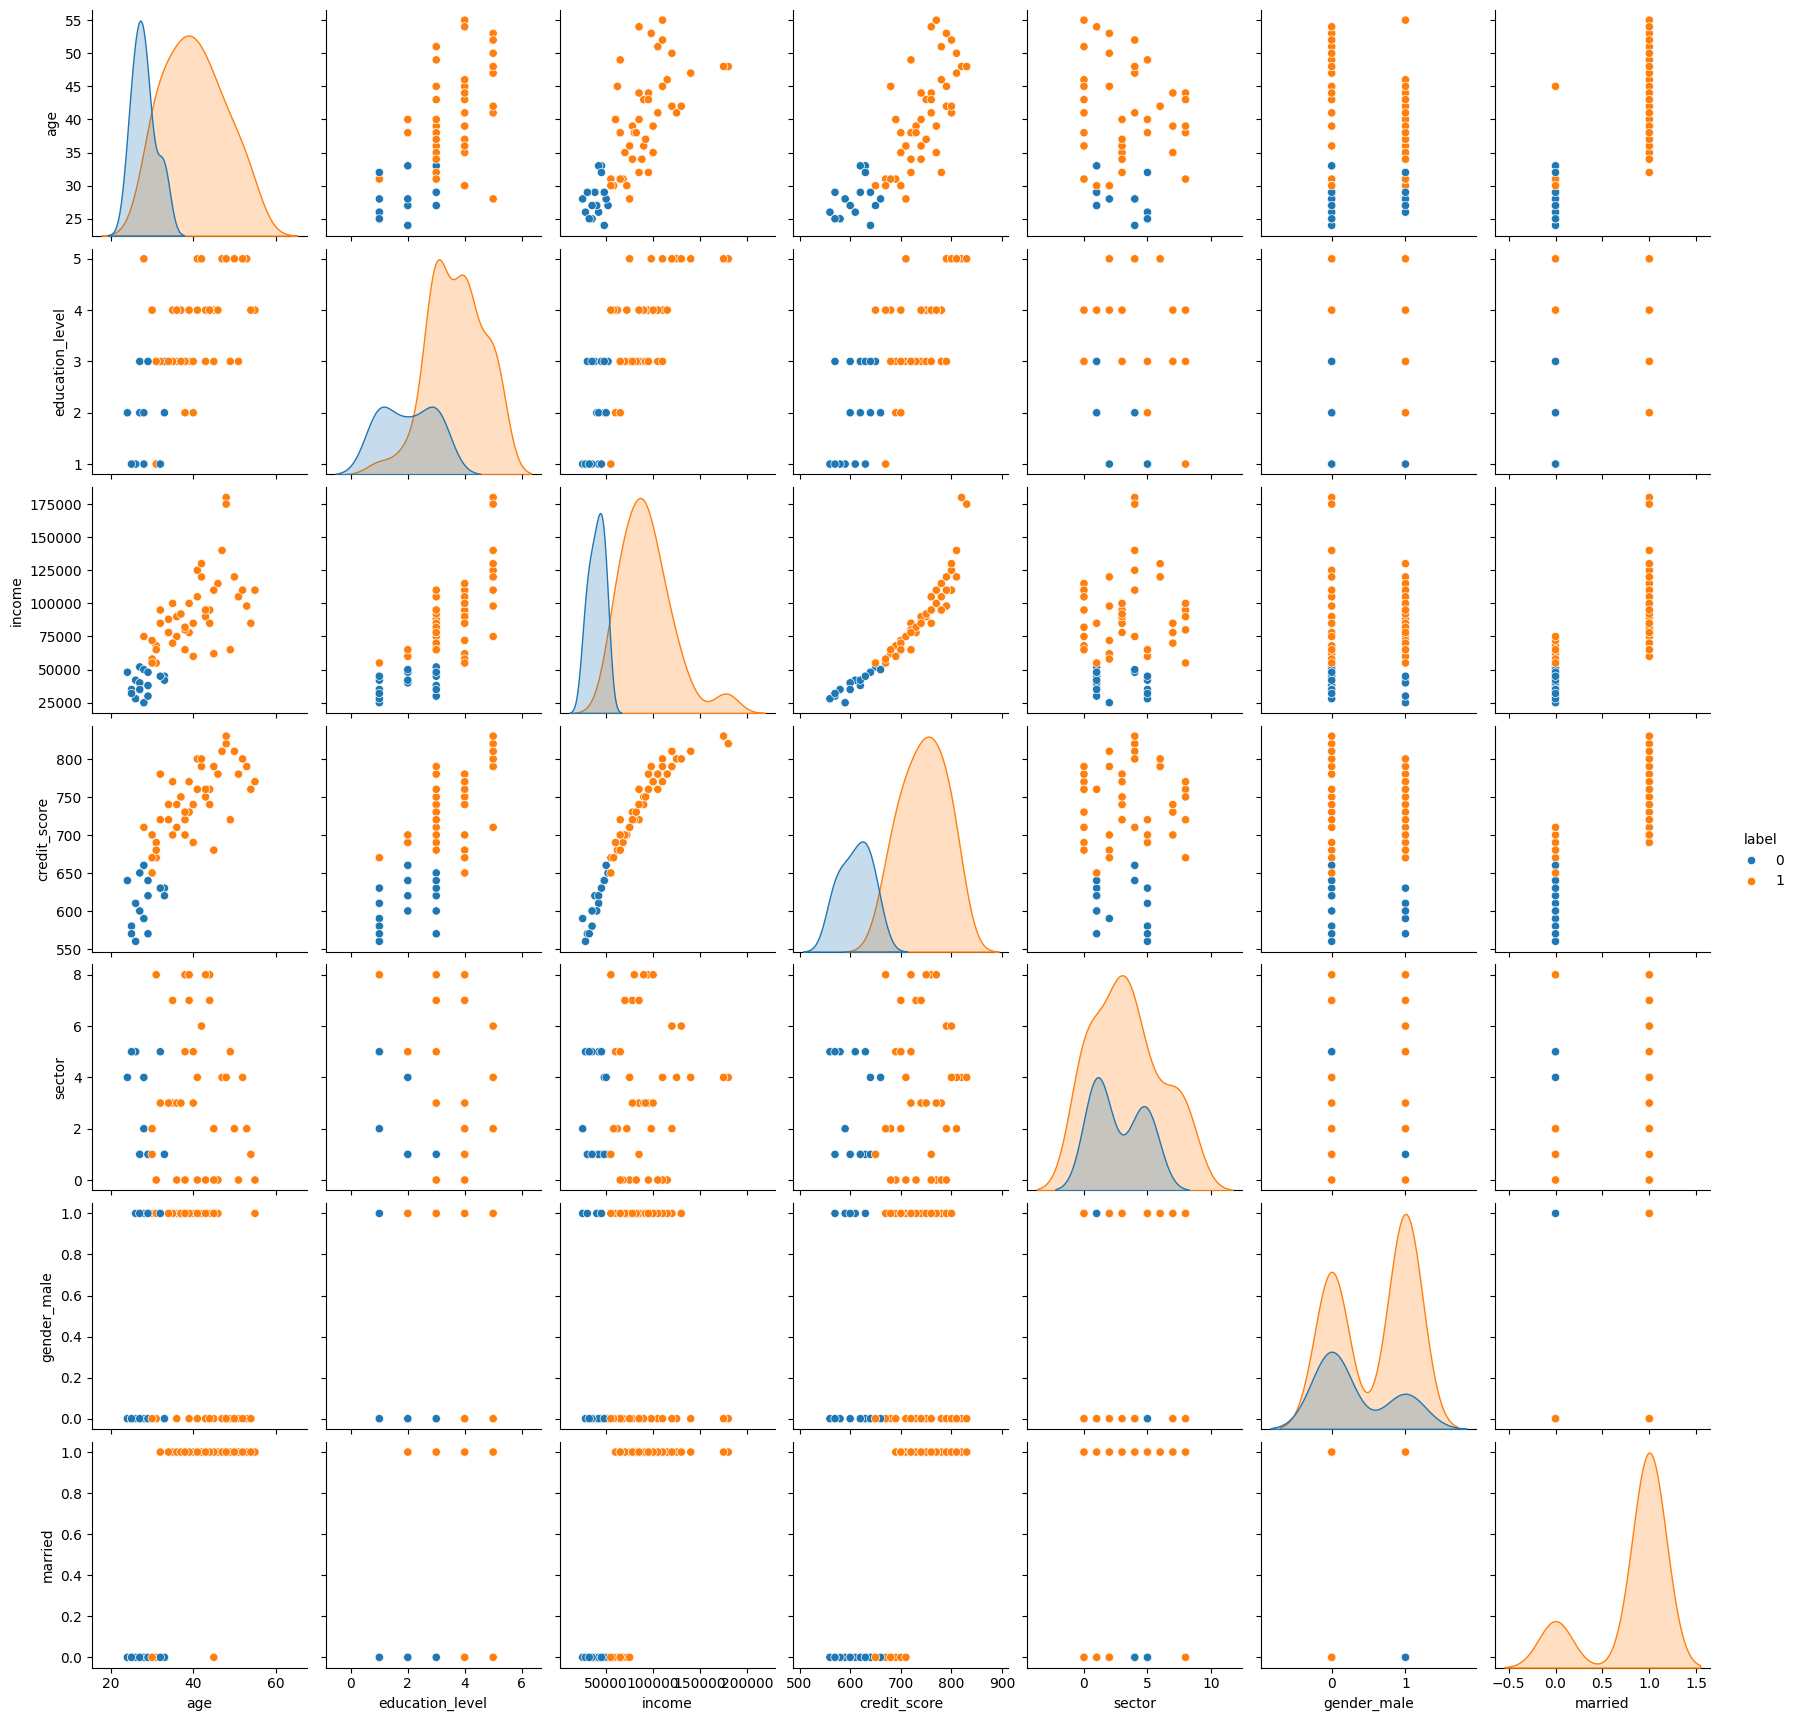

In [88]:
sns.pairplot(df, hue='label')
plt.show()

In [89]:
df.head()

,age,education_level,income,credit_score,sector,gender_male,married,label
0,32,3,85000,720,3,1,1,1
1,45,4,62000,680,2,0,0,1
2,28,1,25000,590,2,1,0,0
3,51,3,105000,780,0,0,1,1
4,36,3,75000,710,0,1,1,1


In [91]:
log_model.coef_

array([[0.49195171, 1.10539219, 1.07265964, 1.33554401, 0.46756529,
        0.06600532, 0.27756728]])

In [92]:
log_model.intercept_

array([-1.82634978])

In [95]:

intercept = log_model.intercept_[0]
coef1 = log_model.coef_[0][0]
coef2 = log_model.coef_[0][1]
coef3 = log_model.coef_[0][2]
coef4 = log_model.coef_[0][3]
coef5 = log_model.coef_[0][4]
coef6 = log_model.coef_[0][5]
coef7 = log_model.coef_[0][6]


# Define the logistic regression equation as a string
equation = f"P(y=1|X) = 1 / (1 + e^(-({intercept} + {coef1} * X1 + {coef2} * X2 + {coef3} * X3 + {coef4} * X4 + {coef5} * X5 + {coef6} * X6 + {coef7} * X7)))"

In [96]:
from IPython.display import Markdown
Markdown(f"## Logistic Regression Equation\n\n{equation}")

## Logistic Regression Equation

P(y=1|X) = 1 / (1 + e^(-(-1.826349779499002 + 0.4919517060437617 * X1 + 1.105392188563821 * X2 + 1.0726596399043338 * X3 + 1.3355440109871617 * X4 + 0.4675652898296103 * X5 + 0.06600531589106648 * X6 + 0.27756728489361243 * X7)))